In [3]:
%matplotlib inline

##Simulate the [OI] line seen by SOFIA-GREAT

###PDR + shocked gas

In [27]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import astropy.constants as const
from astropy.convolution import Gaussian1DKernel, convolve

def gaussian(x, mu, sig):
    # everything in unit of km/s and K
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# constants setup
c = const.c.cgs.value
k = const.k_B.cgs.value

In [63]:
# import Herschel flat spectra of L1551-IRS5
(wl, flux, unc) = np.genfromtxt('/Users/yaolun/test/L1551-IRS5/cube/L1551-IRS5_pacs_pixel13_os8_sf7_flat_spectrum.txt', skip_header=1).T
oi_wl = 63.18367004
velo_cen = (wl - oi_wl)*c/oi_wl/1e5
Tr_cen = flux * (13.6 * (300e9/(c/oi_wl/1e-4))**2 / 6.3**2)

(wl, flux, unc) = np.genfromtxt('/Users/yaolun/test/L1551-IRS5/cube/L1551-IRS5_pacs_pixel7_os8_sf7_flat_spectrum.txt', skip_header=1).T
oi_wl = 63.18367004
velo_red = (wl - oi_wl)*c/oi_wl/1e5
Tr_red = flux * (13.6 * (300e9/(c/oi_wl/1e-4))**2 / 6.3**2)

(wl, flux, unc) = np.genfromtxt('/Users/yaolun/test/L1551-IRS5/cube/L1551-IRS5_pacs_pixel19_os8_sf7_flat_spectrum.txt', skip_header=1).T
oi_wl = 63.18367004
velo_blue = (wl - oi_wl)*c/oi_wl/1e5
Tr_blue = flux * (13.6 * (300e9/(c/oi_wl/1e-4))**2 / 6.3**2)

total [OI] flux (in K km/s): 12.83, 9.69, and 9.69 at center, red, and blue.

assume line from PDR has Gaussian width of 5 km/s, 

and line from shocked gas has width of 20 km/s with velocity offset of ? km/s

SOFIA-GREAT observes [OI] line with resolution of 5 km/s


Herschel line shows that it has -45, 30, and -75 km/s offset.

SOFIA-GREAT: XFFTS - 64000 channels, 44kHz, and 2.5GHz bandwidth; AFFTS - 7075 channels, 212kHz, and 1.5GHz bandwidth

###center position

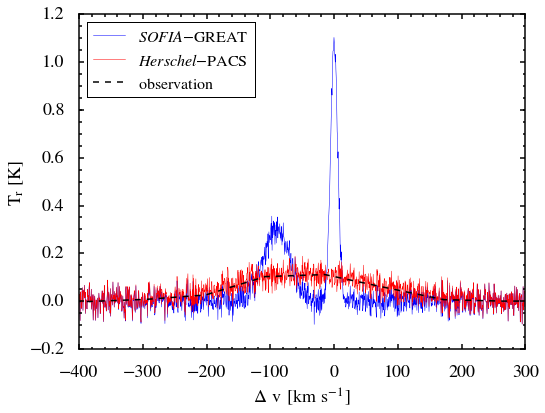

In [68]:
oi_flux = 12.83
v = np.linspace(-1000, 1000, 4000)
oi_pdr = gaussian(v, 0, 5) * 0.5*oi_flux/1.064/5.
oi_shock = gaussian(v, -90, 20) * 0.5*oi_flux/1.064/20.
oi_center = oi_pdr + oi_shock
noise = np.random.normal(0, 0.032, len(oi_shock))
# plt.plot(v, oi_center)

gauss_herschel = Gaussian1DKernel(stddev=186)
gauss_great = Gaussian1DKernel(stddev=5)
oi_center_convolve_her = convolve(oi_center, gauss_herschel, boundary='extend') + noise
oi_center_convolve_great = convolve(oi_center, gauss_great, boundary='extend') + noise

# make plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

great_con, = ax.plot(v, oi_center_convolve_great, 'Blue', linewidth=0.5, label=r'$\it{SOFIA}-\rm{GREAT}$')
her_con, = ax.plot(v, oi_center_convolve_her, 'Red', linewidth=0.5, label=r'$\it{Herschel}-\rm{PACS}$')
her, = ax.plot(velo_cen, Tr_cen, 'k--', linewidth=1.5, label=r'$\rm{observation}$')
ax.set_xlim([-400, 300])
ax.set_xlabel(r'$\rm{\Delta}\,v\,\rm{[km\,s^{-1}]}$', fontsize=18)
ax.set_ylabel(r'$\rm{T_{r}\,[K]}$', fontsize=18)
ax.legend(numpoints=1, fontsize=16, loc='upper left')
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on() 
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/Dropbox/sofia-cycle4/oi_center.pdf', dpi=300, bbox_inches='tight')

###red-shifted

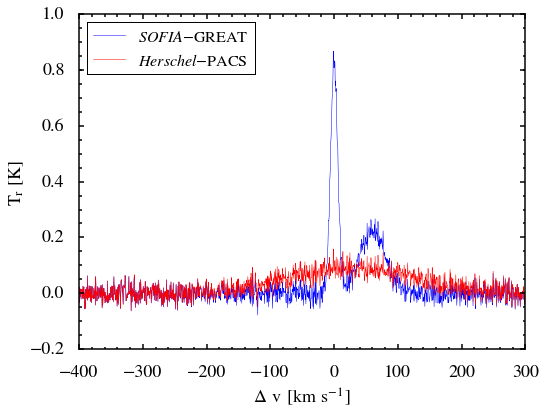

In [70]:
oi_flux = 9.7
v = np.linspace(-1000, 1000, 4000)
oi_pdr = gaussian(v, 0, 5) * 0.5*oi_flux/1.064/5.
oi_shock = gaussian(v, 60, 20) * 0.5*oi_flux/1.064/20.
oi_center = oi_pdr + oi_shock
noise = np.random.normal(0, 0.024, len(oi_shock))
# plt.plot(v, oi_center)

gauss_herschel = Gaussian1DKernel(stddev=186)
gauss_great = Gaussian1DKernel(stddev=5)
oi_center_convolve_her = convolve(oi_center, gauss_herschel, boundary='extend') + noise
oi_center_convolve_great = convolve(oi_center, gauss_great, boundary='extend') + noise

# make plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

great_con, = ax.plot(v, oi_center_convolve_great, 'Blue', linewidth=0.5, label=r'$\it{SOFIA}-\rm{GREAT}$')
her_con, = ax.plot(v, oi_center_convolve_her, 'Red', linewidth=0.5, label=r'$\it{Herschel}-\rm{PACS}$')
# her, = ax.plot(velo_red, Tr_red, 'k--', linewidth=1.5, label=r'$\rm{observation}$')
ax.set_xlim([-400, 300])
ax.set_xlabel(r'$\rm{\Delta}\,v\,\rm{[km\,s^{-1}]}$', fontsize=18)
ax.set_ylabel(r'$\rm{T_{r}\,[K]}$', fontsize=18)
ax.legend(numpoints=1, fontsize=16, loc='upper left')
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on() 
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/Dropbox/sofia-cycle4/oi_red.pdf', dpi=300, bbox_inches='tight')

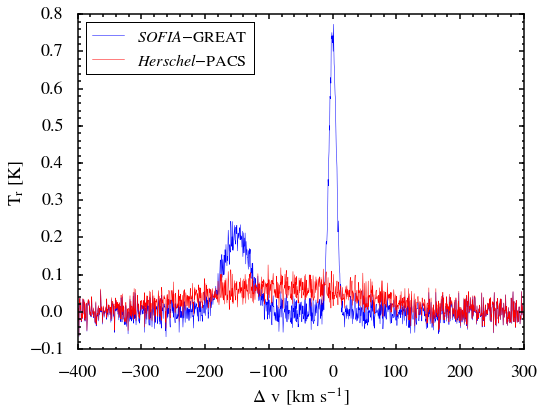

In [71]:
oi_flux = 8.9
v = np.linspace(-1000, 1000, 4000)
oi_pdr = gaussian(v, 0, 5) * 0.5*oi_flux/1.064/5.
oi_shock = gaussian(v, -150, 20) * 0.5*oi_flux/1.064/20.
oi_center = oi_pdr + oi_shock
noise = np.random.normal(0, 0.022, len(oi_shock))
# plt.plot(v, oi_center)

gauss_herschel = Gaussian1DKernel(stddev=186)
gauss_great = Gaussian1DKernel(stddev=5)
oi_center_convolve_her = convolve(oi_center, gauss_herschel, boundary='extend') + noise
oi_center_convolve_great = convolve(oi_center, gauss_great, boundary='extend') + noise

# make plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

great_con, = ax.plot(v, oi_center_convolve_great, 'Blue', linewidth=0.5, label=r'$\it{SOFIA}-\rm{GREAT}$')
her_con, = ax.plot(v, oi_center_convolve_her, 'Red', linewidth=0.5, label=r'$\it{Herschel}-\rm{PACS}$')
# her, = ax.plot(velo_red, Tr_red, 'k--', linewidth=1.5, label=r'$\rm{observation}$')
ax.set_xlim([-400, 300])
ax.set_xlabel(r'$\rm{\Delta}\,v\,\rm{[km\,s^{-1}]}$', fontsize=18)
ax.set_ylabel(r'$\rm{T_{r}\,[K]}$', fontsize=18)
ax.legend(numpoints=1, fontsize=16, loc='upper left')
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on() 
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/Dropbox/sofia-cycle4/oi_blue.pdf', dpi=300, bbox_inches='tight')